
#Cover Page

**Developed by:**

**Fatma Mohamed Ali - 41810121**

**Mohamed Salah Eldin - 41810303**

#Import the dataset from drive

In [ ]:
!gdown --id 1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld

Downloading...
From: https://drive.google.com/uc?id=1MbUWPsEZJ_Dana5RC07wUGTIgzN92Uld
To: /content/seeds.csv
100% 9.12k/9.12k [00:00<00:00, 7.75MB/s]


#Importing libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# show how the data looks like

In [ ]:
df = pd.read_csv("seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Check if all data are numbers and if there is a relations between the data


In [ ]:
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()

#Heatmap

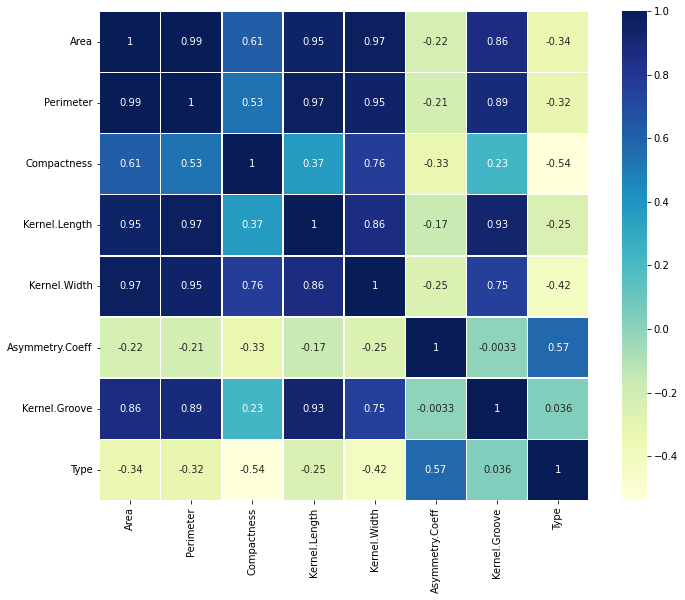

In [ ]:
#df.corr()
x,y = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),cmap='YlGnBu',square=True,linewidth=.5,annot=True)
plt.show()

# Check for the null 

In [ ]:
df.isna().any()
#df.isnull().sum()
df.dropna()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


# show mean, max , min so handle the data if there is a gap between 75% and max  


In [ ]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


# check for the outlier

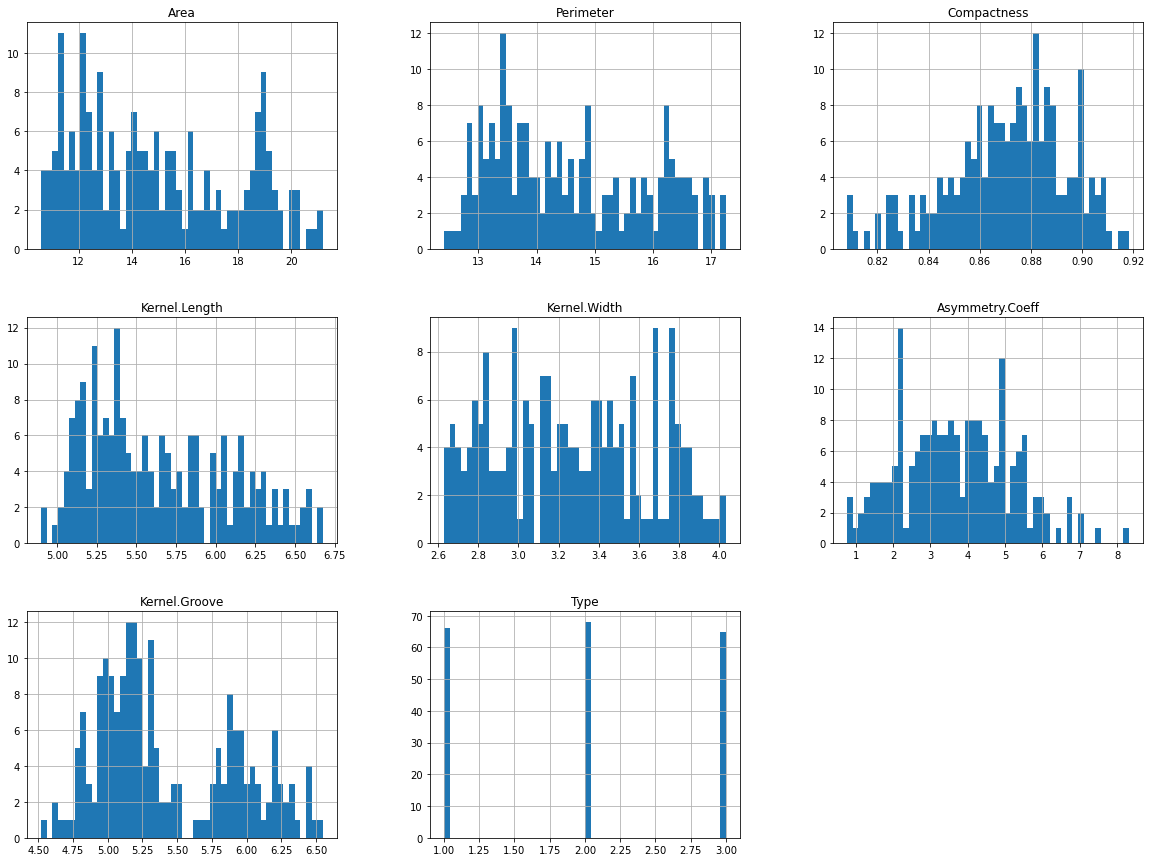

In [ ]:
"""
df['Area'].skew()
df['Asymmetry.Coeff'].skew()
plt.boxplot(df['Kernel.Groove'])
plt.show()
"""
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
df.shape

(199, 8)

**drop the outlier**


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (IQR)
df = df[~((df < (Q1 - 1.5 *  IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print (df.shape)

Area               5.1250
Perimeter          2.3350
Compactness        0.0297
Kernel.Length      0.7350
Kernel.Width       0.6100
Asymmetry.Coeff    2.2290
Kernel.Groove      0.8330
Type               2.0000
dtype: float64
(194, 8)


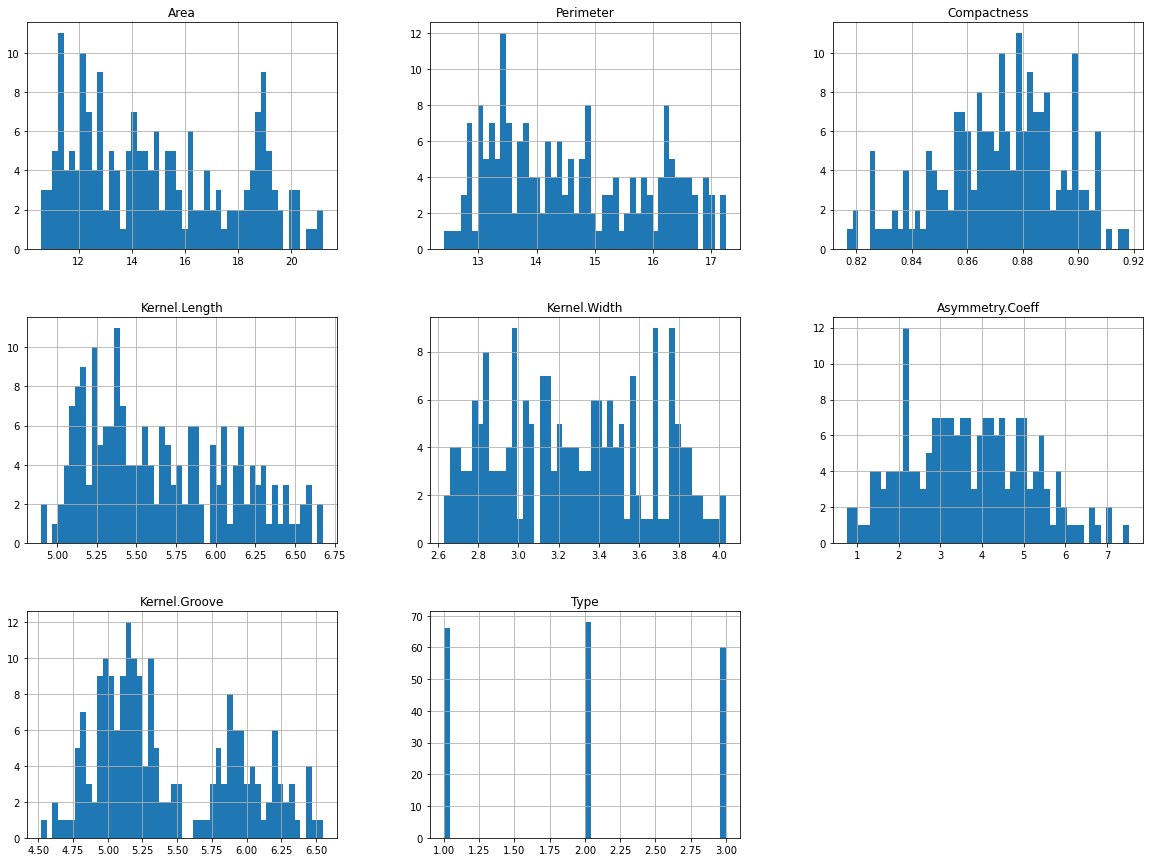

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

#Normalization

In [ ]:
scaler=StandardScaler()
scaler.fit(df)
dataset=scaler.transform(df)
dataset

array([[ 0.08940162,  0.16240209, -0.04548938, ..., -0.99515999,
        -0.41618709, -1.20334942],
       [-0.04159992, -0.04411943,  0.41849757, ..., -1.83328902,
        -0.94820851, -1.20334942],
       [-0.24499705, -0.41126881,  1.5164469 , ..., -0.66213781,
        -1.21220398, -1.20334942],
       ...,
       [-1.29990421, -1.33679119, -0.9596815 , ...,  0.47069495,
        -0.85349257,  1.28015895],
       [-1.08961226, -1.084376  , -0.9137422 , ..., -0.03580531,
        -0.77086803,  1.28015895],
       [-0.93103144, -0.98493971, -0.16493157, ...,  1.38476419,
        -0.73257861,  1.28015895]])

#Start Split the data and train

In [ ]:
df_target = df["Type"]  #save target for training set
df = df.drop("Type", axis=1) #drop target for training set

**train_test_split imported from sklearn.model_selection**

In [ ]:
"""
#split the data for training and validation
First Way to split data 
train_set_size= int(len (df) * 0.7)
train_set = df [:train_set_size][:]
valid_set = df [train_set_size:][:]

train_target = df_target [:train_set_size]
valid_target = df_target [train_set_size:]
print(len (train_set), "train +", len(valid_set), "valid")
"""
#second way
train_set, valid_set = train_test_split(df, test_size=0.2)
train_target, valid_target = train_test_split (df_target, test_size=0.2)
print(len(train_set), "train +", len(valid_set), "valid")

155 train + 39 valid


**Using linear model for trainning** 

**LinearRegression imported from sklearn.linear_model**


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_set, train_target)

LinearRegression()

#find the mean square error

**mean_squared_error imported from from sklearn.metrics**

**np.sqrt imported from numpy** 

In [ ]:
Type_predictions = lin_reg.predict(valid_set)
lin_mse = mean_squared_error(valid_target, Type_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8181891724915298

**mean_absolute_error imported from from sklearn.metrics**


In [ ]:
lin_mae = mean_absolute_error(valid_target, Type_predictions)
lin_mae

0.6768894786585864